In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

gamguel = pd.read_csv('제주도의감귤제배비율.csv', encoding='cp949')
gamguel.head()
gamguel.set_index('시도별', inplace=True) # 시도별 열을 인덱스로

data = data.apply(pd.to_numeric, errors='coerce')

gamguel

In [ ]:
x = data.columns.astype(int)
fig, ax = plt.subplots(figsize=(14, 6))
width = 0.4

# 왼쪽 전국 & 오른쪽 제주도 데이터 배치
ax.bar(x, data.loc['계'], width, label='전국', color='lightblue')
ax.bar([p + width for p in x], data.loc['제주도'],width, label='제주도', color='orange')

# 전국,제주도 생산비율
for i in range(len(x)):
    bu = (data.loc['제주도'].iloc[i] / data.loc['계'].iloc[i]) * 100
    ax.text(x[i] + width / 2, data.loc['제주도'].iloc[i] + 0.02 * data.loc['제주도'].max(),
            f'{bu:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# 그래프 레이블 및 타이틀
ax.set_xlabel('년도')
ax.set_ylabel('감귤 재배량 (톤)')
ax.set_title('제주도와 한국 전체 감귤 재배량 비교')

ax.legend()

plt.tight_layout()
plt.show()

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt

bigyu = pd.read_csv("귤가격 및 생활물가.csv")

x2 = bigyu.columns[2:]   # X 축
gcosts = bigyu.iloc[0, 2:]  # 0행 귤가격
jcosts = bigyu.iloc[1, 2:]  # 1행 전체생활물가
bigyu

,시도별,품목별,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,제주도,귤가격,93.345,59.152,73.919,69.157,79.979,37.115,62.391,70.538,...,79.367,73.728,77.565,126.817,123.955,117.653,100,103.98,121.99,151.31
1,제주도,전체생활물가,46.760,49.523,52.441,58.096,59.444,60.972,63.406,65.774,...,93.757,93.673,94.807,97.258,98.945,99.234,100,103.54,110.14,113.82


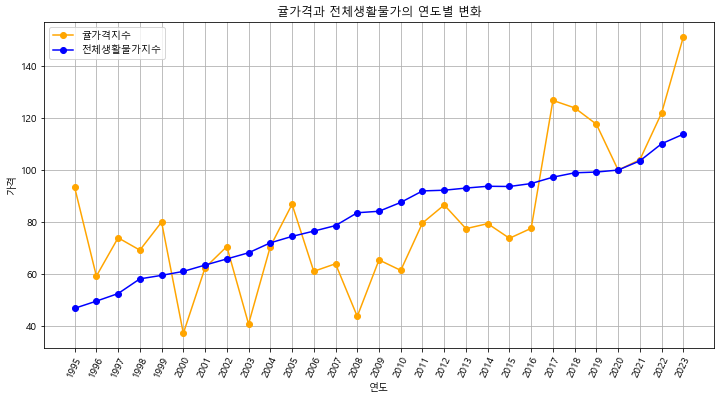

In [55]:
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 귤가격과 전체생활물가를 선 그래프로 표시
plt.plot(x2, gcosts,color='orange', label='귤가격지수', marker='o')
plt.plot(x2, jcosts,color='blue', label='전체생활물가지수', marker='o')

# 그래프에 레이블 추가
plt.xlabel('연도')
plt.ylabel('가격')
plt.title('귤가격과 전체생활물가의 연도별 변화')
plt.xticks(rotation=65)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.savefig('22.png', format='png')
plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

kion = pd.read_csv("제주도년평균기온.csv", encoding="cp949")
daeya = pd.read_csv("제주도년열대야일수.csv", encoding="utf-8")

# 평균기온 데이터 정제

kion = kion.dropna(subset=['평균기온(℃)'])
x_kion = kion['년'].astype(int)
y_kion = kion['평균기온(℃)'].astype(float)

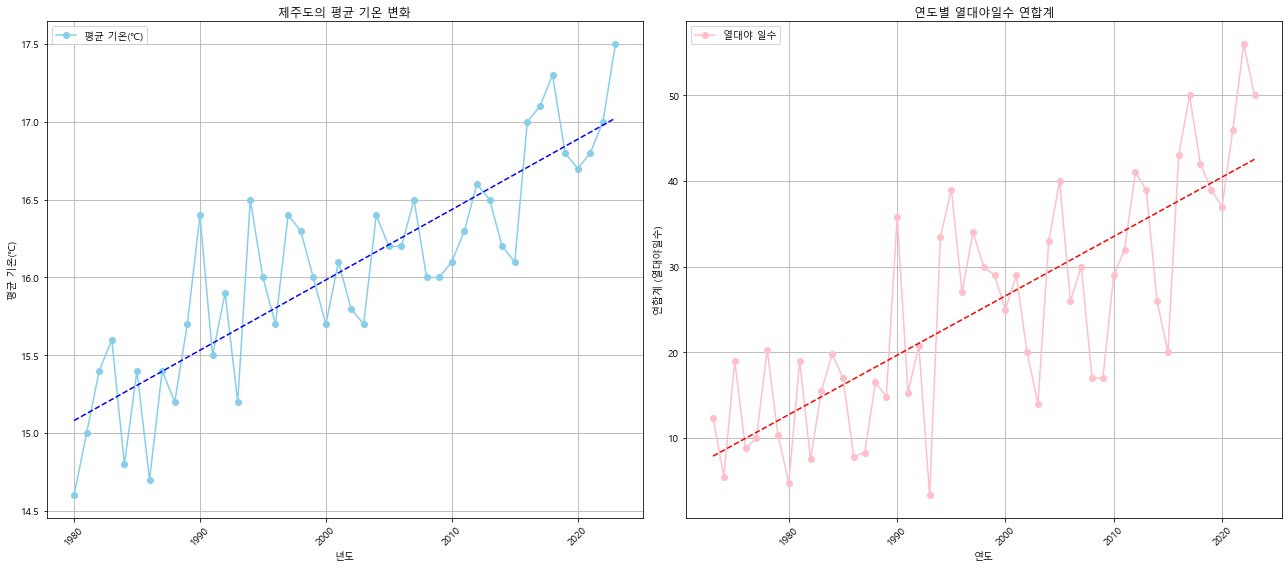

In [57]:
# 그래프
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1) 
plt.plot(x_kion, y_kion, marker='o', color='skyblue', linestyle='-', label='평균 기온(℃)')
plt.xlabel('년도')
plt.ylabel('평균 기온(℃)')
plt.title('제주도의 평균 기온 변화')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 선형 회귀선 추가
coef_kion = np.polyfit(x_kion, y_kion, 1)
sunhyung_kion = np.poly1d(coef_kion)
plt.plot(x_kion, sunhyung_kion(x_kion), linestyle='--', color='blue', label='선형 회귀선')

# 열대야일수 데이터 정제
plt.subplot(1, 2, 2) 
x_daeya = daeya['연도'].astype(int)
y_daeya = daeya['연합계'].astype(float)

# 그래프
plt.plot(x_daeya, y_daeya, marker='o', linestyle='-', color='pink', label='열대야 일수')
plt.xlabel('연도')
plt.ylabel('연합계 (열대야일수)')
plt.title('연도별 열대야일수 연합계')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 선형 회귀선 추가
coef_daeya = np.polyfit(x_daeya, y_daeya, 1)
sunhyung_daeya = np.poly1d(coef_daeya)
plt.plot(x_daeya, sunhyung_daeya(x_daeya), linestyle='--', color='r', label='선형 회귀선')

plt.tight_layout()
plt.savefig('33.png', format='png')
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

kihoo = pd.read_csv("전국 및 제주 폭풍일수.csv", encoding="utf-8")
yeol = pd.read_csv("열대야일수_제주및전국(in).csv", encoding="utf-8")

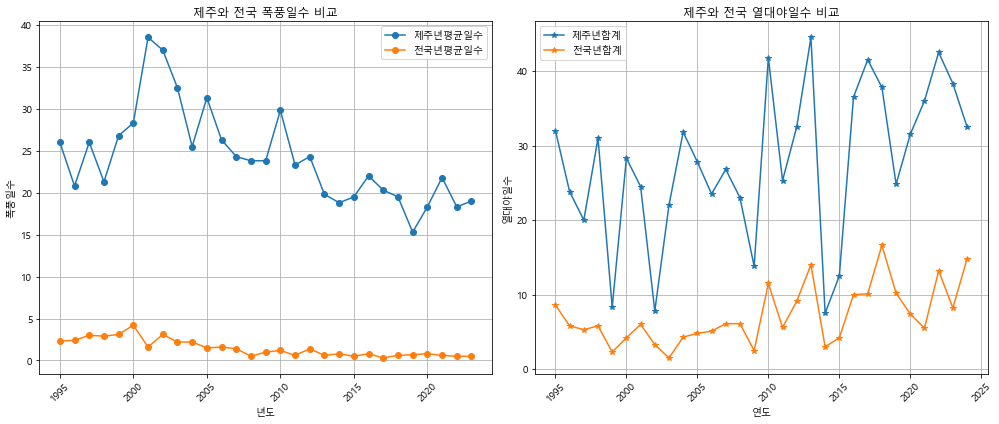

In [58]:
# 그래프 그리기
plt.figure(figsize=(14, 6))

# 첫 번째 그래프: 폭풍일수 비교
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
plt.plot(kihoo['년도'], kihoo['제주년합계'], label='제주년평균일수', marker='o')
plt.plot(kihoo['년도'], kihoo['전국년합계'], label='전국년평균일수', marker='o')
plt.xlabel('년도')
plt.ylabel('폭풍일수')
plt.title('제주와 전국 폭풍일수 비교')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# 두 번째 그래프: 열대야일수 비교
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
plt.plot(yeol['연도'], yeol['제주년합계'], label='제주년합계', marker='*')
plt.plot(yeol['연도'], yeol['전국년합계'], label='전국년합계', marker='*')
plt.xlabel('연도')
plt.ylabel('열대야일수')
plt.title('제주와 전국 열대야일수 비교')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('44.png', format='png')
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

daeya = pd.read_csv("제주도년열대야일수.csv", encoding="utf-8")
bigyu = pd.read_csv("귤가격 및 생활물가.csv")
orange_prices = bigyu[bigyu['시도별'] == '제주도'].iloc[0, 2:]
years_orange = orange_prices.index.astype(int)
daeya_filtered = daeya[daeya['연도'] >= 1995]
years_daeya = daeya_filtered['연도'].astype(int)
daeya_values = daeya_filtered['연합계'].astype(float)

                            OLS Regression Results                            
Dep. Variable:                   귤_가격   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     60.28
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.38e-08
Time:                        10:20:34   Log-Likelihood:                 18.061
No. Observations:                  29   AIC:                            -32.12
Df Residuals:                      27   BIC:                            -29.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0329      0.052      0.633      0.5

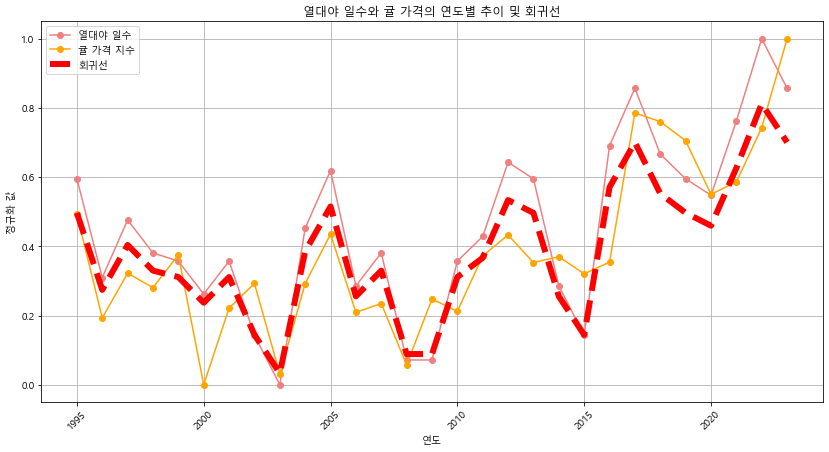

In [59]:
#정규화
scaler = MinMaxScaler()
daeya_normalized = scaler.fit_transform(daeya_values.values.reshape(-1, 1)).flatten()
scaler = MinMaxScaler()
orange_normalized = scaler.fit_transform(orange_prices.values.reshape(-1, 1)).flatten()

# 데이터프레임 생성
data = pd.DataFrame({
    '열대야_일수': daeya_normalized,
    '귤_가격': orange_normalized
})

# OLS 회귀 분석
X = sm.add_constant(data['열대야_일수'])
y = data['귤_가격']

model = sm.OLS(y, X).fit()
print(model.summary())

# 그래프 그리기
plt.figure(figsize=(14, 7))

# 정규화된 열대야 일수, 귤가격 플로팅
plt.plot(years_daeya, data['열대야_일수'], marker='o', linestyle='-', color='lightcoral', label='열대야 일수')
plt.plot(years_orange, data['귤_가격'], marker='o', linestyle='-', color='orange', label='귤 가격 지수')

# 회귀선 플로팅
plt.plot(years_daeya, model.predict(X), color='red', linestyle='--', label='회귀선', linewidth=6)

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('정규화 값')
plt.title('열대야 일수와 귤 가격의 연도별 추이 및 회귀선')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('55.png', format='png')

plt.show()

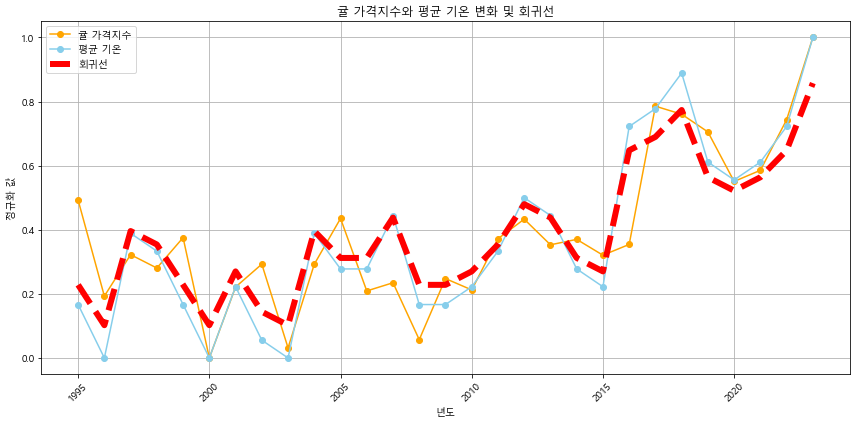

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# 귤 가격, 평균기온 데이터 정제
bigyu = pd.read_csv("귤가격 및 생활물가.csv")
bigyu

jeju_orange_prices = bigyu[bigyu['시도별'] == '제주도'].iloc[0, 2:]
jeju_orange_prices.head()

kion = pd.read_csv("제주도년평균기온.csv", encoding="cp949")
kion1 = kion.dropna(subset=['평균기온(℃)'])
kion.head()
# 데이터 정규화
scaler = MinMaxScaler()
jeju_orange_prices_normalized = scaler.fit_transform(jeju_orange_prices.values.reshape(-1, 1)).flatten()
scaler = MinMaxScaler()
y_kion_full_normalized = scaler.fit_transform(kion_full['평균기온(℃)'].values.reshape(-1, 1)).flatten()
# X
years = jeju_orange_prices.index.astype(int)
x_kion = kion['년'].astype(int)
# 연도와 평균 기온 추출
y_kion = kion['평균기온(℃)'].astype(float)
full_year_range = pd.Series(range(1995, 2024))


# 평균 기온 데이터 읽기
kion = pd.read_csv("제주도년평균기온.csv", encoding="cp949")
kion = kion.dropna(subset=['평균기온(℃)'])
x_kion = kion['년'].astype(int)
y_kion = kion['평균기온(℃)'].astype(float)

#데이터프레임 생성
data = pd.DataFrame({
    '연도': full_year_range,
    '귤_가격_정규화': pd.Series(jeju_orange_prices_normalized, index=years).
    reindex(full_year_range).fillna(method='ffill').values,
    '평균기온_정규화': y_kion_full_normalized
})

# OLS 회귀 분석
X = sm.add_constant(data['평균기온_정규화'])  # 상수항 추가
y = data['귤_가격_정규화']

model = sm.OLS(y, X).fit()
model.summary()


# 그래프 그리기
plt.figure(figsize=(12, 6))

# 정규화된 귤 가격 데이터
plt.plot(data['연도'], data['귤_가격_정규화'], marker='o', color='orange', label='귤 가격지수')

# 정규화된 평균 기온 데이터
plt.plot(data['연도'], data['평균기온_정규화'], marker='o', color='skyblue', linestyle='-', label='평균 기온')
plt.plot(data['연도'], model.predict(X), color='red', linestyle='--', label='회귀선', linewidth=6)

plt.xlabel('년도')
plt.ylabel('정규화 값')

plt.title('귤 가격지수와 평균 기온 변화 및 회귀선')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('66.png', format='png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                귤가격_정규화   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                  0.004291
Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.948
Time:                        10:32:31   Log-Likelihood:                 1.0508
No. Observations:                  29   AIC:                             1.898
Df Residuals:                      27   BIC:                             4.633
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3831      0.078      4.914      

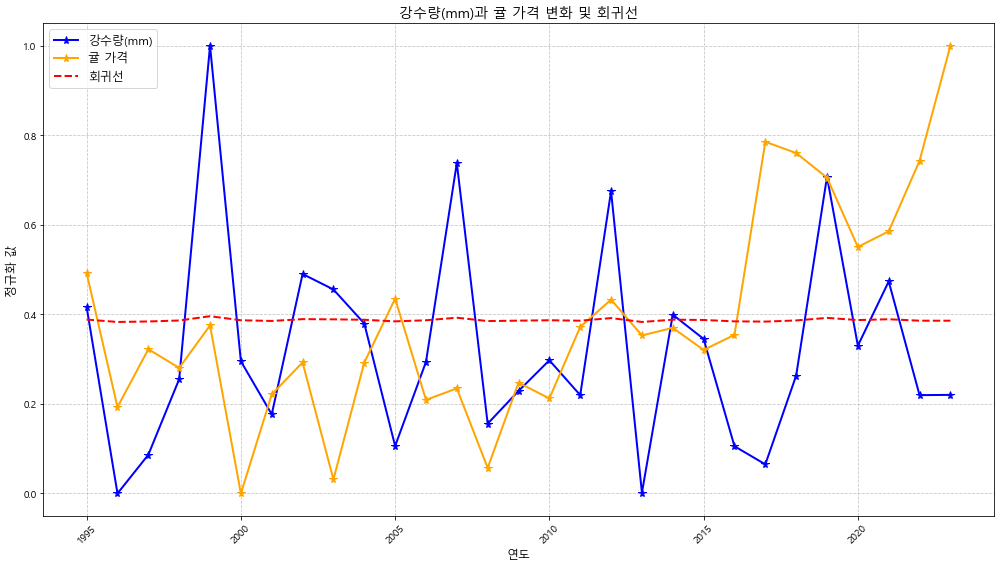

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# 강수량 데이터와 귤 가격 데이터 읽기 및 정제
kangsoo = pd.read_csv("789강수량.csv", encoding='cp949')
kangsoo['연도'] = kangsoo['년월'].str[:4].astype(int)  # 문자열을 정수로 변환
kangsoo['월'] = kangsoo['년월'].str[-2:]
summerrain = kangsoo[kangsoo['월'].isin(['07', '08', '09'])]
avg789 = summerrain.groupby('연도')['강수량(mm)'].mean().reset_index()

bigyu = pd.read_csv("귤가격 및 생활물가.csv")
jeoranpr = bigyu[bigyu['시도별'] == '제주도'].iloc[0, 2:]
jeoranpr.index = jeoranpr.index.astype(int)  # 인덱스를 연도로 변환

# 데이터 정규화
scaler = MinMaxScaler()
avg789['강수량(mm)_정규화'] = scaler.fit_transform(avg789[['강수량(mm)']])
jeoranpr_norm = scaler.fit_transform(jeoranpr.values.reshape(-1, 1))
jeoranpr_norm = pd.Series(jeoranpr_norm.flatten(), index=jeoranpr.index, name='귤가격_정규화')

# 두 데이터를 병합
regression_data = pd.merge(avg789, jeoranpr_norm, left_on='연도', right_index=True)

# OLS 회귀 분석
X = sm.add_constant(regression_data['강수량(mm)_정규화'])  # 상수항 추가
y = regression_data['귤가격_정규화']

model = sm.OLS(y, X).fit()
print(model.summary())

# 그래프 그리기
plt.figure(figsize=(14, 8))

plt.plot(regression_data['연도'], regression_data['강수량(mm)_정규화'], 
         label='강수량(mm)', linestyle='-', color='blue', marker='*', markersize=8, linewidth=2)
plt.plot(regression_data['연도'], regression_data['귤가격_정규화'], 
         label='귤 가격', linestyle='-', color='orange', marker='*', markersize=8, linewidth=2)

# 회귀선 플로팅
plt.plot(regression_data['연도'], model.predict(X), color='red', linestyle='--', label='회귀선', linewidth=2)

plt.xlabel('연도', fontsize=12)
plt.ylabel('정규화 값', fontsize=12)
plt.title('강수량(mm)과 귤 가격 변화 및 회귀선', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('7.png', format='png')
plt.show()


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# 귤 가격 데이터 읽기
bigyu = pd.read_csv("귤가격 및 생활물가.csv")
jeju_orange_prices = bigyu[bigyu['시도별'] == '제주도'].iloc[0, 2:]
years_orange = jeju_orange_prices.index.astype(int)

# 열대야일수 데이터 읽기
daeya = pd.read_csv("제주도년열대야일수.csv", encoding="utf-8")
daeya_filtered = daeya[daeya['연도'] >= 1995]
x_daeya = daeya_filtered['연도'].astype(int)
y_daeya = daeya_filtered['연합계'].astype(float)

# 평균 기온 데이터 읽기
kion = pd.read_csv("제주도년평균기온.csv", encoding="cp949")
kion = kion.dropna(subset=['평균기온(℃)'])
x_kion = kion['년'].astype(int)
y_kion = kion['평균기온(℃)'].astype(float)

                            OLS Regression Results                            
Dep. Variable:               귤_가격_정규화   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     45.48
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           3.24e-09
Time:                        10:22:52   Log-Likelihood:                 22.852
No. Observations:                  29   AIC:                            -39.70
Df Residuals:                      26   BIC:                            -35.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0474      0.075     -0.633      0.5

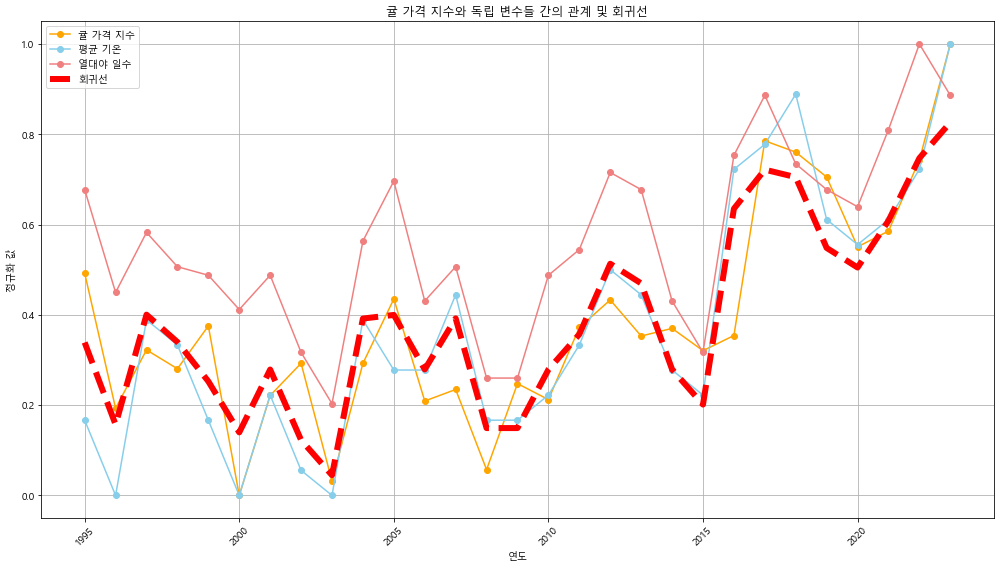

In [62]:
# 데이터 범위 통일 (X값)
year_x = pd.Series(range(1995, 2024))
kion_full = pd.DataFrame({'년': year_x})
kion_full = pd.merge(kion_full, kion[['년', '평균기온(℃)']], on='년', how='left')
kion_full['평균기온(℃)'].fillna(method='ffill', inplace=True)

# 정규화
scaler = MinMaxScaler()

# 귤 가격 데이터 정규화
jeju_orange_prices_normalized = scaler.fit_transform(jeju_orange_prices.values.reshape(-1, 1)).flatten()

# 평균 기온 데이터 정규화
y_kion_full_normalized = scaler.fit_transform(kion_full['평균기온(℃)'].values.reshape(-1, 1)).flatten()

# 열대야 일수 데이터 정규화
scaler_standard = MinMaxScaler()
y_daeya_normalized = scaler_standard.fit_transform(y_daeya.values.reshape(-1, 1)).flatten()

full_year_range = pd.Series(range(1995, 2024))

# 정규화된 데이터프레임 생성
data = pd.DataFrame({
    '연도': full_year_range,
    '귤_가격_정규화': pd.Series(jeju_orange_prices_normalized, index=years_orange).reindex(full_year_range).fillna(method='ffill').values,
    '평균기온_정규화': y_kion_full_normalized,
    '열대야_일수_정규화': pd.Series(y_daeya_normalized, index=x_daeya).reindex(full_year_range).fillna(method='ffill').values
})

# 다중 회귀 분석
X = data[['평균기온_정규화', '열대야_일수_정규화']]
X = sm.add_constant(X)  # 상수항 추가
y = data['귤_가격_정규화']

model = sm.OLS(y, X).fit()
print(model.summary())

# 그래프 그리기
plt.figure(figsize=(14, 8))

# 정규화된 귤 가격 데이터
plt.plot(data['연도'], data['귤_가격_정규화'], marker='o', linestyle='-', color='orange', label='귤 가격 지수')

# 독립 변수들 시각화
plt.plot(data['연도'], data['평균기온_정규화'], marker='o', linestyle='-', color='skyblue', label='평균 기온')
plt.plot(data['연도'], data['열대야_일수_정규화'], marker='o', linestyle='-', color='lightcoral', label='열대야 일수')

# 회귀선 플로팅
plt.plot(data['연도'], model.predict(X), color='red', linestyle='--', label='회귀선', linewidth=6)

plt.xlabel('연도')
plt.ylabel('정규화 값')
plt.title('귤 가격 지수와 독립 변수들 간의 관계 및 회귀선')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('8.png', format='png')
plt.show()


In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

bigyu = pd.read_csv("귤가격 및 생활물가.csv")
# 귤가격 데이터 
jeju_orange_prices = bigyu[bigyu['시도별'] == '제주도'].iloc[0, 2:]
# 숫자데이터로 정제
jeju_orange_prices = jeju_orange_prices.astype(float)

years = jeju_orange_prices.index.astype(int)


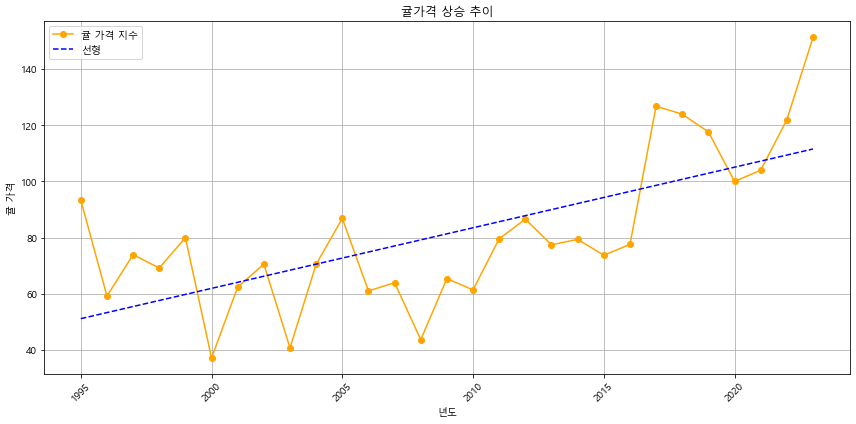

In [61]:
coef = np.polyfit(years, jeju_orange_prices, 1)  # 1차원 다항식(직선)
poly1d_fn = np.poly1d(coef)  # 다항식을 함수로 변환

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(years, jeju_orange_prices, marker='o', color='orange', label='귤 가격 지수')

# 선형
plt.plot(years, poly1d_fn(years), linestyle='--', color='blue', label='선형')

# 그래프 레이블 추가
plt.xlabel('년도')
plt.ylabel('귤 가격')
plt.title('귤가격 상승 추이')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('9.png', format='png')
plt.show()

10:22:38 - cmdstanpy - INFO - Chain [1] start processing
10:22:38 - cmdstanpy - INFO - Chain [1] done processing


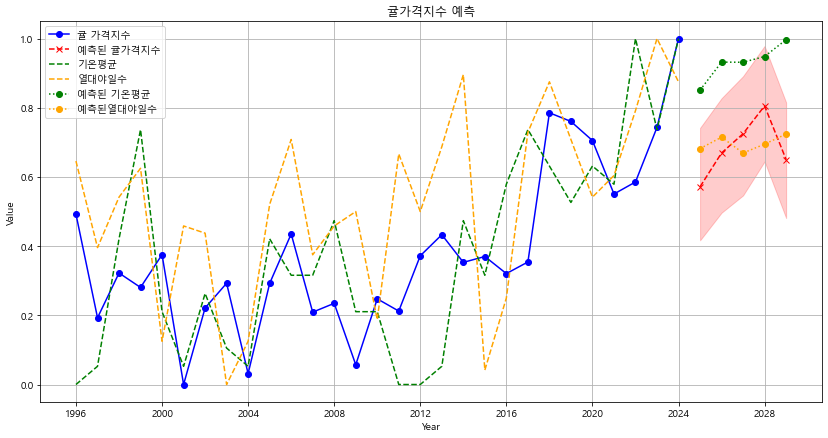

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

years = list(range(1995, 2024))
orange_price = [
    0.492403, 0.192977, 0.322291, 0.280590, 0.375358,
    0.000000, 0.221341, 0.292684, 0.031481, 0.292465,
    0.435229, 0.209133, 0.234669, 0.057104, 0.247647,
    0.212295, 0.372092, 0.433005, 0.353045, 0.369999,
    0.320618, 0.354219, 0.785516, 0.760454, 0.705267,
    0.550681, 0.585534, 0.743246, 1.000000
]

temp = [
    0.000000, 0.052632, 0.421053, 0.736842, 0.210526,
    0.052632, 0.263158, 0.105263, 0.052632, 0.421053,
    0.315789, 0.315789, 0.473684, 0.210526, 0.210526,
    0.000000, 0.000000, 0.052632, 0.473684, 0.315789,
    0.578947, 0.736842, 0.631579, 0.526316, 0.631579,
    0.578947, 1.000000, 0.736842, 1.000000
]

daeya = [
    0.645833, 0.395833, 0.541667, 0.625000, 0.125000,
    0.458333, 0.437500, 0.000000, 0.125000, 0.520833,
    0.708333, 0.375000, 0.458333, 0.500000, 0.187500,
    0.666667, 0.500000, 0.687500, 0.895833, 0.041667,
    0.250000, 0.729167, 0.875000, 0.708333, 0.541667,
    0.604167, 0.791667, 1.000000, 0.875000
]

df = pd.DataFrame({
    'ds': pd.date_range(start='1995-01-01', periods=len(years), freq='Y'),#datetime 형식으로 넣어야함
    'y': orange_price,
    'temp': temp,
    'daeya': daeya
})

model = Prophet()
model.add_regressor('temp')
model.add_regressor('daeya')
model.fit(df)

pre_years = list(range(2024, 2029))
pre_temp = [0.851098, 0.931951, 0.931535, 0.948178, 0.996929]
pre_daeya = [0.682031, 0.714987, 0.669309, 0.694790, 0.724020]
future = pd.DataFrame({
    'ds': pd.date_range(start='2024-01-01', periods=len(pre_years), freq='Y'), #datetime 형식으로 넣어야함
    'temp': pre_temp,
    'daeya': pre_daeya 
})

forecast = model.predict(future)

df_combined = pd.concat([df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]], axis=0)

plt.figure(figsize=(14, 7))

plt.plot(df['ds'], df['y'], label='귤 가격지수', color='blue', marker='o')

plt.plot(forecast['ds'], forecast['yhat'], label='예측된 귤가격지수', color='red', linestyle='--', marker='x')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

plt.plot(df['ds'], df['temp'], label='기온평균', color='green', linestyle='--')
plt.plot(df['ds'], df['daeya'], label='열대야일수', color='orange', linestyle='--')

plt.plot(future['ds'], future['temp'], label='예측된 기온평균', color='green', linestyle=':', marker='o')
plt.plot(future['ds'], future['daeya'], label='예측된열대야일수', color='orange', linestyle=':', marker='o')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('귤가격지수 예측')
plt.legend()
plt.grid(True)
plt.savefig('10.png', format='png')
plt.show()


In [42]:
import numpy as np

g_values = np.array([93.345, 59.152, 73.919, 69.157, 79.979, 37.115, 62.391, 70.538, 40.71, 
                            70.513, 86.816, 60.997, 63.913, 43.636, 65.395, 61.358, 79.606, 86.562, 
                            77.431, 79.367, 73.728, 77.565, 126.817, 123.955, 117.653, 100, 103.98, 
                            121.99, 151.31])

nor_values = np.array([0.571717, 0.669323, 0.724942, 0.805425, 0.650189])

g_min = np.min(g_values)
g_max = np.max(g_values)

# 정규화된 귤예측지수 값을 원본 값으로 변환
o_values = nor_values * (g_max - g_min) + g_min
o_values

array([102.40222281, 113.54833998, 119.89975169, 129.09050787,
       111.36333286])